# TP 2: Résolution du problème de convection-diffusion
##### Mécanique des fludies numériques II  - INSA (4A-MFE)
#### Séance de Travaux Pratiques
[@François Beaubert](mailto:francois.beaubert@univ-valkenciennes.fr)

> Ce TP traite de la modélisation et de la simulation de la dispersion
d’un polluant émis dans l’atmosphère (par une usine par exemple). Il est scindé en deux étapes: 
* On traitera dans un premier temps le problème de convection pure en 1D
* Il s'agira ensuite de traiter le problème de convection-diffusion en 2D

Nous considérons ici un modèle simplifié de convection-diffusion:

-   la convection est dûe au mouvement de l’air qui disperse le
    polluant. Ce phénomène est un phénomène macroscopique.

-   le phénomène de diffusion est un phénomène microscopique; les
    particules des espèces chimiques polluantes ont tendance à aller des
    zones de haute concentration vers les zones de faible concentration.

Dans le modèle de convection-diffusion, ces deux types de dispersion
sont pris en compte. Par ailleurs nous supposons que le polluant est
constitué d’un seul composant chimique et que celui-ci n’interagit avec
aucun autre composant. Il n’y a donc pas de réaction chimique.

Sous ces hypothèses l’équation aux dérivées partielles du modèle peut
s’écrire:

$$\frac{\partial c}{\partial t}\left(M,t\right)+\overrightarrow{u}\left(M\right).\nabla c\left(M,t\right)=K\triangle c\left(M,t\right)$$

où :

-   $\overrightarrow{u}\left(M\right)$ est la vitesse de l’air au point
    $M=\left(x,y,z\right)_{\overrightarrow{i},\overrightarrow{j},\overrightarrow{k}}$
    , la vitesse est supposée ici indépendante du temps

-   $c\left(M,t\right)$ est la concentration au point $M$ et au temps
    $t$

-   $K$ est la diffusivité du polluant avec $K>0$

-   les opérateurs $\nabla$ et $\triangle$ désignent respectivement le
    gradient et le laplacien

Pour résoudre le problème il faut lui joindre:

-   une condition initiale: $c\left(M,0\right)=c_{0}\left(M\right)$

-   des conditions aux limites: $c\left(M,t\right)=0$ pour
    $M\;\epsilon\;\Gamma$ où $\Gamma$ est la frontière du domaine
    $\Omega$.

# 1. Modèle de convection pure

Pour simplifier le problème, considérons dans un premier temps le cas de
la convection pure 1D où la vitesse de convection $U_{0}$ est constante.
L’équation du modèle dite aussi *équation de transport* est la suivante:

$$\frac{\partial c}{\partial t}\left(x,t\right)+U_{0}\frac{\partial c}{\partial x}\left(x,t\right)=0$$

avec la condition initiale:

$$c\left(x,0\right)=c_{0}\left(x\right)=\left\{ \begin{array}{cc}
10x-15 & si\quad x\in]1,5;2,5]\\
-10x+35 & si\quad x\in]2,5;3,5]\\
0 & sinon
\end{array}\right.$$

et la condition de bord suivante:

$$c\left(0,t\right)=0$$

où $U_{0}>0$ est la vitesse de convection, $c\left(x,t\right)$ est la
concentration du polluant.

Il est facile de vérifier que la solution de l’équation de transport est
donnée par:

$$c\left(x,t\right)=c_{0}\left(x-U_{0}t\right)$$

On prendra comme valeurs numériques: $U_{0}=0,5\;m.s^{-1}$,
$L=10\mathtt{\;m}$.

En utilisant les développements en série de Taylor, écrire l’équation
aux différences finies correspondant au problème continu en le discrétisant en $(x_i,t_n)$.

1.  Le schéma sera établi avec une *différence avant* en temps à l’ordre
    1 ainsi qu’une *différence centrée* en espace à l’ordre 2. Montrer
    par la méthode de Von Neumann que ce schéma est inconditionnellement
    instable !

2.  Écrire un nouveau schéma numérique en utilisant pour la dérivée
    spatiale une *différence arrière* à l’ordre 1. L'étude de la stabilité 
    montre  que ce schéma est conditionnellement stable, la condition de stabilité étant:
    $0\le\frac{U_{0}\Delta t}{\Delta x}\le1$.

3.  Écrire un programme `Python` utilisant des fonctions qui permet de résoudre l’équation
    de transport. Pour discrétiser le domaine 1D $\left[0;L\right]$ vous
    utiliserez 100 intervalles. 
    
    Implémentez le second schéma et effectuez une simulation jusqu’à $t=10s$ en prenant un pas de temps $\Delta t$ qui :
    * vérifie exactement le critère de stabilité $\frac{U_{0}\Delta t}{\Delta x}=1$
    * reste inférieur au critère de stabilité

    Que ce passe t’il dans le dernier cas ?

# 2. Problème de convection-diffusion

Nous considérons à présent le modèle de convection-diffusion 2D.

1.  Écrire l’équation aux dérivées partielles dans le cas où le champ de
    vent sur le site est régulier et suivant une direction privilégiée.
    On supposera donc que la vitesse de convection est constante et
    donnée par $\vec{U_{0}}=\left(U_{0},0\right)$.

2.  Écrire le schéma numérique correspondant en $(x_i,y_j,t_n)$ en utilisant:
    * une *différence avant en temps* à l’ordre 1
    * une *différence centrée en espace* à l’ordre 2 pour les termes diffusifs et convectifs. 
    
    Montrer que le schéma peut s’écrire sous la forme:

    $$\frac{c_{i,j}^{n+1}-c_{i,j}^{n}}{\Delta t}-K\left[\frac{c_{i+1,j}^{n}-2c_{i,j}^{n}+c_{i-1,j}^{n}}{\Delta x^{2}}+\frac{c_{i,j+1}^{n}-2c_{i,j}^{n}+c_{i,j-1}^{n}}{\Delta y^{2}}\right]+U_{0}\frac{c_{i+1,j}^{n}-c_{i-1,j}^{n}}{2\Delta x}=0$$

    où $c_{i,j}^{n}=c\left(x_{i},y_{j},t^{n}\right)$ avec
    $x_{i}=i\Delta x$ et $y_{j}=j\Delta y$

    * Préciser les pas d’espaces ainsi que domaine de validité des indices.
    * Donner le type de ce schéma numérique.
    
    L'étude de la stabilité permet de montrer que le critére de stabilité à vérifier est le suivant:
    
    $$S_x+S_y \le \frac{1}{2} \textrm{ et } \frac{C_x^2}{S_x} + \frac{C_y^2}{S_y} \le 2$$
    
    avec 
    
    $$C_x=U_0\Delta t/\Delta x,\quad C_y=V_0\Delta t/\Delta y,\quad S_x=K\Delta t/\Delta x^2, \quad S_y=K\Delta t/\Delta y^2$$


3.  Écrire un programme `Python` utilisant des fonctions qui permet de résoudre l’équation
    de convection-diffusion 2D. Pour discrétiser le domaine 2D vous
    utiliserez $100\times100$ intervalles dans le plan
    $\left(xOy\right)$. Implémenter le schéma numérique obtenu en
    utilisant les conditions suivantes:

    $\Omega=\left[0,L\right]\times\left[0,L\right]$ avec $L=1000\;m$,
    $K=100\;m^{2}.s^{-1}$, $U_{0}=30\;m.s^{-1}$

    avec :

    -   comme *condition initiale*:

        $$c\left(x,y,t=0\right)=c_{0}\left(x,y\right)=\left\{ \begin{array}{ccc}
        100 & si & r\le\frac{2R_{0}}{3}\\
        50\left(1+\cos\left(\frac{\pi}{R_{0}}\left(3r-2R_{0}\right)\right)\right) & si & \frac{2R_{0}}{3}<r\le R_{0}\\
        0 & si & r>R_{0}
        \end{array}\right)$$

        avec $R_{0}=100$ et
        $r^{2}=\left(x-x_{0}\right)^{2}+\left(y-y_{0}\right)^{2}$,
        $x_{0}=200$ et $y_{0}=500$

    -   comme *conditions aux limites*:

        $c\left(0,y,t\right)=c\left(L,y,t\right)=c\left(x,0,t\right)=c\left(x,L,t\right)=0\quad\forall t$




#### Remarques:
Pour tester différentes paramètres comme le pas de temps $\Delta t$ ou afficher la solution à différents instants vous pouvez utiliser les fonctionnalités interactives des `widgets` du `ipython notebook` comme dans l'exemple donné ci-dessous.

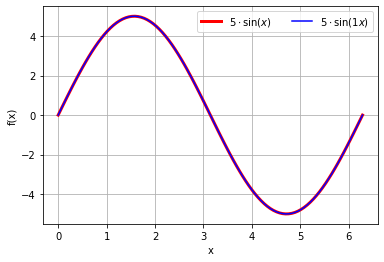

In [2]:
%pylab inline

# On charge les widgets pour interagir avec les graphiques
from IPython.html.widgets import interact
from IPython.html import widgets

x=linspace(0,2*pi,100)

def plot_interactive(f=1,A=5):
    plot(x,5*sin(x),'r', linewidth=3, label='$5 \cdot \sin(x)$')
    plot(x,A*sin(x*f),'b', label='$'+str(A)+'\cdot\sin('+str(f)+'x)$')
    xlabel("x")
    ylabel("f(x)")
    grid()
    legend(ncol=2)

interact(plot_interactive, f=(1,10,1), A=(0,10,1));

Pour tracer un champs 2D vous pouvez utilser la fonction `pcolormesh` de la façon suivante:

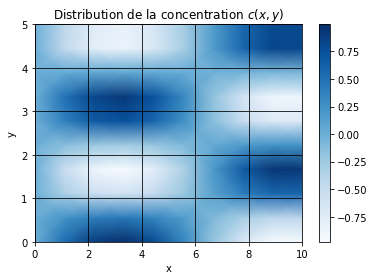

In [3]:
# Definition du maillage du domaine de calcul 1D
N=10

x=linspace(0,10,N)
y=linspace(0,5,N)

# Definition du champs c
c=zeros((N,N))
for j in range(0,N):
    for i in range(0,N):
        c[i,j] = cos(x[i])*sin(y[j])
        
# Affichage du champs c en 2D
pcolormesh(x,y,c[:,:],cmap=cm.Blues,shading='gouraud') # avec shading
# pcolormesh(x,y,c[:,:],cmap=cm.Blues) # sans shading
xlabel('x')
ylabel('y')
title('Distribution de la concentration $c(x,y)$')
grid(color='k')
colorbar()